In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import load_img, img_to_array
import numpy as np


In [2]:
#function to merge 2 folders into 1 to get the dataset in one place
def merge_folders(folder1, folder2, new_folder):
    if not os.path.exists(new_folder):
        os.makedirs(new_folder)
    for filename in os.listdir(folder1):
        os.rename(folder1 + '/' + filename, new_folder + '/' + filename)
    for filename in os.listdir(folder2):
        os.rename(folder2 + '/' + filename, new_folder + '/' + filename)
    os.rmdir(folder1)
    os.rmdir(folder2)
    return new_folder

In [2]:
path1 = 'C:/Users/zaema/OneDrive/Desktop/SEMESTER_7/DL/task4/HAM10000_images_part_1'
path2 = 'C:/Users/zaema/OneDrive/Desktop/SEMESTER_7/DL/task4/HAM10000_images_part_2'
path3 = 'C:/Users/zaema/OneDrive/Desktop/SEMESTER_7/DL/task4/HAM10000_images'

In [ ]:
#the merged folder is saved in path3
path3 = merge_folders(path1, path2, path3)

In [ ]:
#show contents of path3

print(os.listdir(path3))
print(len(os.listdir(path3)))

['ISIC_0024306.jpg', 'ISIC_0024307.jpg', 'ISIC_0024308.jpg', 'ISIC_0024309.jpg', 'ISIC_0024310.jpg', 'ISIC_0024311.jpg', 'ISIC_0024312.jpg', 'ISIC_0024313.jpg', 'ISIC_0024314.jpg', 'ISIC_0024315.jpg', 'ISIC_0024316.jpg', 'ISIC_0024317.jpg', 'ISIC_0024318.jpg', 'ISIC_0024319.jpg', 'ISIC_0024320.jpg', 'ISIC_0024321.jpg', 'ISIC_0024322.jpg', 'ISIC_0024323.jpg', 'ISIC_0024324.jpg', 'ISIC_0024325.jpg', 'ISIC_0024326.jpg', 'ISIC_0024327.jpg', 'ISIC_0024328.jpg', 'ISIC_0024329.jpg', 'ISIC_0024330.jpg', 'ISIC_0024331.jpg', 'ISIC_0024332.jpg', 'ISIC_0024333.jpg', 'ISIC_0024334.jpg', 'ISIC_0024335.jpg', 'ISIC_0024336.jpg', 'ISIC_0024337.jpg', 'ISIC_0024338.jpg', 'ISIC_0024339.jpg', 'ISIC_0024340.jpg', 'ISIC_0024341.jpg', 'ISIC_0024342.jpg', 'ISIC_0024343.jpg', 'ISIC_0024344.jpg', 'ISIC_0024345.jpg', 'ISIC_0024346.jpg', 'ISIC_0024347.jpg', 'ISIC_0024348.jpg', 'ISIC_0024349.jpg', 'ISIC_0024350.jpg', 'ISIC_0024351.jpg', 'ISIC_0024352.jpg', 'ISIC_0024353.jpg', 'ISIC_0024354.jpg', 'ISIC_0024355.jpg',

In [3]:

# Load the metadata
metadata = pd.read_csv('C:/Users/zaema/OneDrive/Desktop/SEMESTER_7/DL/task4/HAM10000_metadata.csv')

In [4]:
# Define a function to load images based on image id
def load_images(image_ids, folder):
    images = []
    for img_id in image_ids:
        img_path = os.path.join(folder, img_id + '.jpg')  # Assuming the images are in jpg format
        img = load_img(img_path, target_size=(64, 64))  # Resizing the image
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)


In [5]:
# Load the images from the folder
X = load_images(metadata['image_id'], path3)

In [6]:
y = metadata['dx'].values

In [7]:
# Encoding the labels for one hot encoding implementation in model 4
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42)

In [8]:
#split the test data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.90, random_state=42)

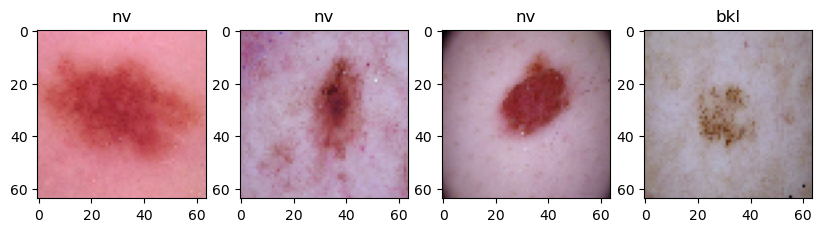

In [9]:
import matplotlib.pyplot as plt
#function to display the images

def show_samples(N, data, labels, type='train'):
    if type == 'train':
        samples = X_train[:N]
        sample_labels = y_train[:N]
    else:
        samples = X_test[:N]
        sample_labels = y_test[:N]

    plt.figure(figsize=(10, 10))
    for i in range(N):
        plt.subplot(1, N, i+1)
        plt.imshow(samples[i].astype('uint8'))
        plt.title(encoder.classes_[sample_labels[i]])
    plt.show()

show_samples(4, X_train, y_train)  # Display 5 training samples


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [12]:
#check distribution of classes in training data
unique, counts = np.unique(y_train, return_counts=True)
print (np.asarray((unique, counts)))

[[   0    1    2    3    4    5    6]
 [ 258  421  871   87  887 5367  121]]


In [13]:
#check resolution of images
X_train.shape[1:]

(64, 64, 3)

In [11]:
#function to plot the accuracy and loss curves for all models
def plot_curves(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train accuracy')
    plt.plot(history.history['val_accuracy'], label='Val accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Val loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

In [12]:
def trainingerror(history):
    score = history.evaluate(X_train, y_train, verbose=0)
    print('Training loss: {0:.4f}\nTraining accuracy:  {1:.4f}'.format(*score))

In [20]:
#model 1
#simple mlp with 1 hidden layer
#the data is not normalized and the model is not optimized
from keras.layers import Dropout, BatchNormalization

def create_optimized_mlp(input_shape, num_classes, hidden_units=[512, 256, 128]):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for units in hidden_units:
        model.add(Dense(units, activation='relu'))
        #model.add(BatchNormalization())
        #model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


#train model without data augmentation
model1 = create_optimized_mlp(X_train.shape[1:], 7)
#training the model1
history1 = model1.fit(X_train, y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_val, y_val))


Epoch 1/10
126/126 [==============================] - 8s 62ms/step - loss: 2.3162 - accuracy: 0.6028 - val_loss: 1.3334 - val_accuracy: 0.5000
Epoch 2/10
126/126 [==============================] - 7s 58ms/step - loss: 1.0789 - accuracy: 0.6482 - val_loss: 1.0706 - val_accuracy: 0.6400
Epoch 3/10
126/126 [==============================] - 7s 59ms/step - loss: 0.9768 - accuracy: 0.6676 - val_loss: 1.0895 - val_accuracy: 0.6450
Epoch 4/10
126/126 [==============================] - 8s 60ms/step - loss: 0.9584 - accuracy: 0.6697 - val_loss: 0.9934 - val_accuracy: 0.6350
Epoch 5/10
126/126 [==============================] - 8s 60ms/step - loss: 0.9481 - accuracy: 0.6742 - val_loss: 1.0028 - val_accuracy: 0.6500
Epoch 6/10
126/126 [==============================] - 8s 60ms/step - loss: 0.9527 - accuracy: 0.6682 - val_loss: 0.9792 - val_accuracy: 0.6750
Epoch 7/10
126/126 [==============================] - 8s 61ms/step - loss: 0.9251 - accuracy: 0.6769 - val_loss: 1.0666 - val_accuracy: 0.6500

In [17]:
#training error
trainingerror(model1)

Training loss: 1.0111
Training accuracy:  0.6675


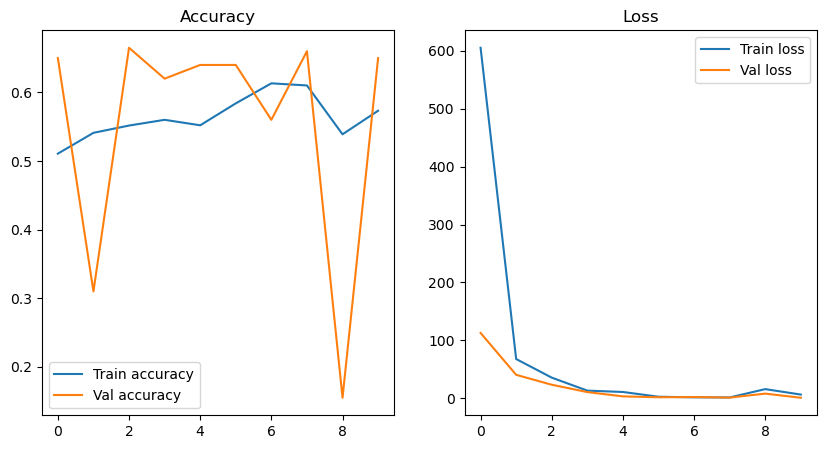

In [18]:
#use the function to plot the curves
plot_curves(history1)

Test loss: 0.9134
Test accuracy:  0.6739
1/1 [==============================] - 0s 80ms/step


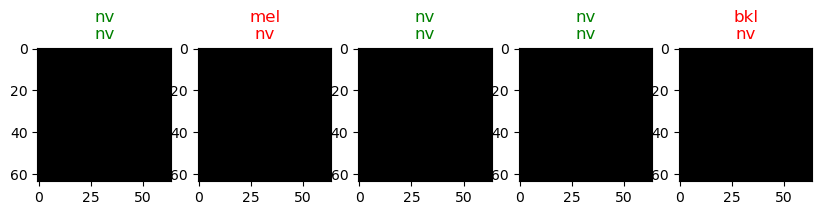

In [21]:
#tessting the model
score = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss: {0:.4f}\nTest accuracy:  {1:.4f}'.format(*score))

#display sample predictions with actual labels and predicted labels

def show_predictions(model, N, data, labels):
    samples = data[:N]
    sample_labels = labels[:N]

    predictions = model.predict(samples)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(10, 10))
    for i in range(N):
        plt.subplot(1, N, i+1)
        plt.imshow(samples[i].astype('uint8'))
        plt.title(encoder.classes_[sample_labels[i]] + '\n' + encoder.classes_[predicted_labels[i]], color='green' if sample_labels[i] == predicted_labels[i] else 'red')
    plt.show()

show_predictions(model1, 5, X_test, y_test)



In [13]:
# Normalize data and augment data to prevent overfitting and remove biasedness
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [14]:
# Class weights
from sklearn.utils import class_weight
weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_train), y = y_train)
class_weights = dict(enumerate(weights))


In [15]:

# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)

In [18]:
#use a smaller lr
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005)


In [19]:
#train model1 with data augmentation
model2 = create_optimized_mlp(X_train[0].shape, len(np.unique(y_train)))

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model2.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), class_weight=class_weights)



NameError: name 'create_optimized_mlp' is not defined

In [ ]:
#evaluate the trained model
trainingerror(model2)

Training loss: 1.3672
Training accuracy:  0.5760


In [ ]:
from keras.initializers import HeNormal
# Calculate class weights
class_weightss = [0.13613358, 0.08342628, 0.0403243,  0.40370648, 0.03959692, 0.00654415, 0.2902683]  # Replace with your desired weights

# Convert to dictionary format
class_weight_dict = {i: class_weightss[i] for i in range(len(np.unique(y_train)))}

def create_simple_mlp(input_shape, num_classes):
    initializer = HeNormal(seed=42)
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(256, activation='relu', kernel_initializer=initializer))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_initializer=initializer))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))
    
    return model


optimizer = Adam(learning_rate=0.0005)
model3 = create_simple_mlp(X_train[0].shape, len(np.unique(y_train)))

model3.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

m3 = model3.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), class_weight=class_weight_dict)


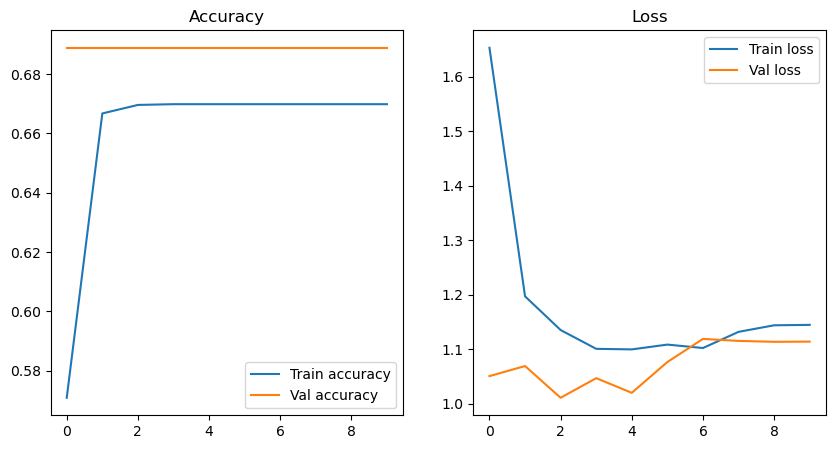

In [ ]:
# Plotting the training and validation loss
plot_curves(m3)



In [ ]:
trainingerror(model3)

Training loss: 1.9437
Training accuracy:  0.0525


In [ ]:
#model 4 with batch normalization and early stopping to prevent overfitting
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

def create_refined_mlp(input_shape, num_classes):
    initializer = HeNormal(seed=42)
    model4 = Sequential()
    model4.add(Flatten(input_shape=input_shape))
    model4.add(Dense(256, activation='relu', kernel_initializer=initializer))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(Dense(128, activation='relu', kernel_initializer=initializer))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))
    
    return model4

optimizer = SGD(learning_rate=0.001, momentum=0.9)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

model4 = create_refined_mlp(X_train[0].shape, len(np.unique(y_train)))
model4.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

m4 = model4.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping])
#evaluate the trained model
train_loss4, train_acc4 = model4.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_loss4)
print('Train accuracy:', train_acc4)


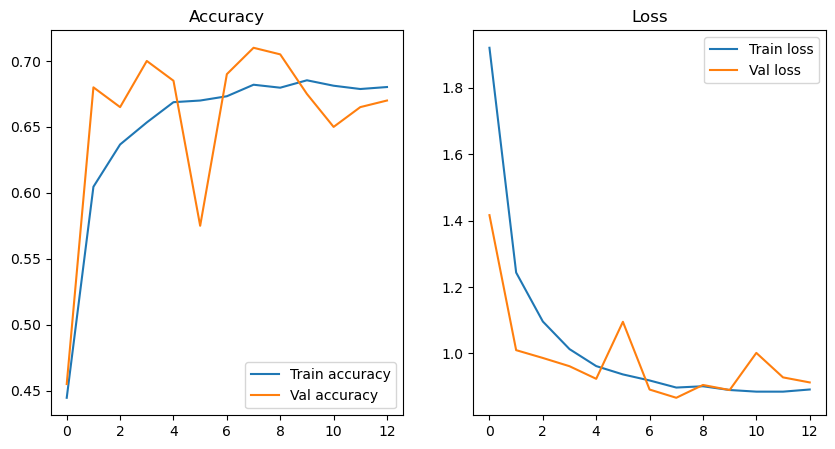

In [31]:
plot_curves(m4)

In [32]:
#function to plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Test loss: 0.8418472409248352
Test accuracy: 0.6882972717285156
57/57 [==============================] - 0s 4ms/step


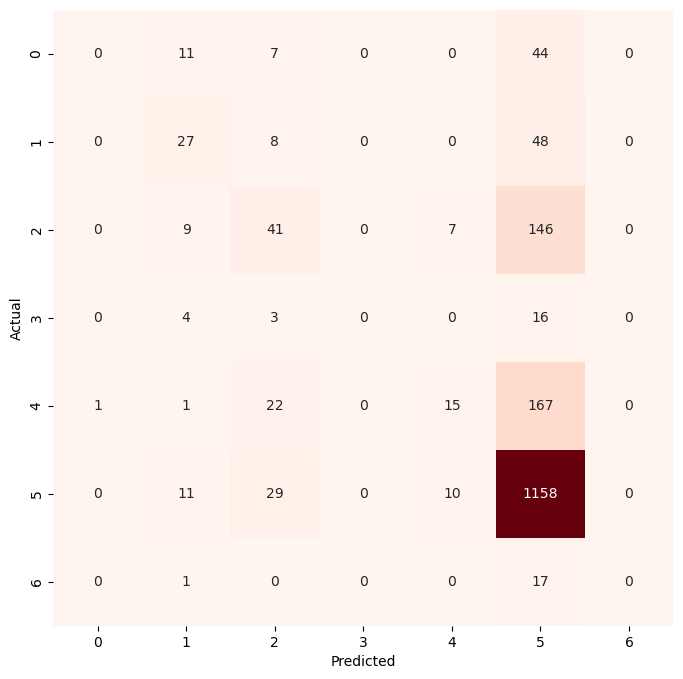

In [33]:
#model 4 with test data
test_loss4, test_acc4 = model4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss4)
print('Test accuracy:', test_acc4)

#plot the confusion matrix
y_pred = model4.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [36]:
#display the images with their predicted and actual labels
def show_samples_with_predictions(N, data, labels, type='train'):
    if type == 'train':
        samples = X_train[:N]
        sample_labels = y_train[:N]
    else:
        samples = X_test[:N]
        sample_labels = y_test[:N]

    plt.figure(figsize=(10, 10))
    for i in range(N):
        plt.subplot(1, N, i+1)
        plt.imshow(samples[i].astype('uint8'))
        plt.title(encoder.classes_[sample_labels[i]] + '\n' + encoder.classes_[y_pred[i]])
    plt.show()

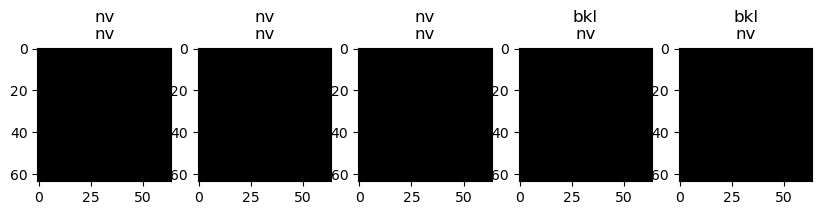

In [35]:
#display 5 images with their predicted and actual labels
show_samples_with_predictions(5, X_test, y_test)  # Display 5 training samples

In [ ]:
#using one hot encoding for the next few models
from keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
y_val_onehot = to_categorical(y_val)



In [ ]:
#model 5
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

def create_refined_mlp(input_shape, num_classes):
    initializer = HeNormal(seed=42)
    model5 = Sequential()
    model5.add(Flatten(input_shape=input_shape))
    model5.add(Dense(256, activation='relu', kernel_initializer=initializer))
    model5.add(BatchNormalization())
    model5.add(Dropout(0.5))
    model5.add(Dense(128, activation='relu', kernel_initializer=initializer))
    model5.add(BatchNormalization())
    model5.add(Dropout(0.5))
    model5.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))
    
    return model5

optimizer = SGD(learning_rate=0.001, momentum=0.9)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

model5 = create_refined_mlp(X_train[0].shape, len(np.unique(y_train)))
model5.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


m5 = model5.fit(X_train, y_train_onehot, batch_size=32, epochs=20, validation_data=(X_val, y_val_onehot), callbacks=[early_stopping])




Epoch 1/20
251/251 [==============================] - 7s 23ms/step - loss: 1.9109 - accuracy: 0.4452 - val_loss: 1.5653 - val_accuracy: 0.4200
Epoch 2/20
251/251 [==============================] - 5s 20ms/step - loss: 1.2502 - accuracy: 0.5984 - val_loss: 1.0105 - val_accuracy: 0.6350
Epoch 3/20
251/251 [==============================] - 5s 20ms/step - loss: 1.0800 - accuracy: 0.6388 - val_loss: 0.9312 - val_accuracy: 0.6850
Epoch 4/20
251/251 [==============================] - 5s 19ms/step - loss: 1.0122 - accuracy: 0.6515 - val_loss: 0.8817 - val_accuracy: 0.6950
Epoch 5/20
251/251 [==============================] - 5s 18ms/step - loss: 0.9614 - accuracy: 0.6686 - val_loss: 0.9864 - val_accuracy: 0.6600
Epoch 6/20
251/251 [==============================] - 5s 18ms/step - loss: 0.9399 - accuracy: 0.6711 - val_loss: 0.9108 - val_accuracy: 0.6900
Epoch 7/20
251/251 [==============================] - 5s 19ms/step - loss: 0.9256 - accuracy: 0.6721 - val_loss: 0.9470 - val_accuracy: 0.6600

Train loss: 0.8423274755477905
Train accuracy: 0.7000749111175537


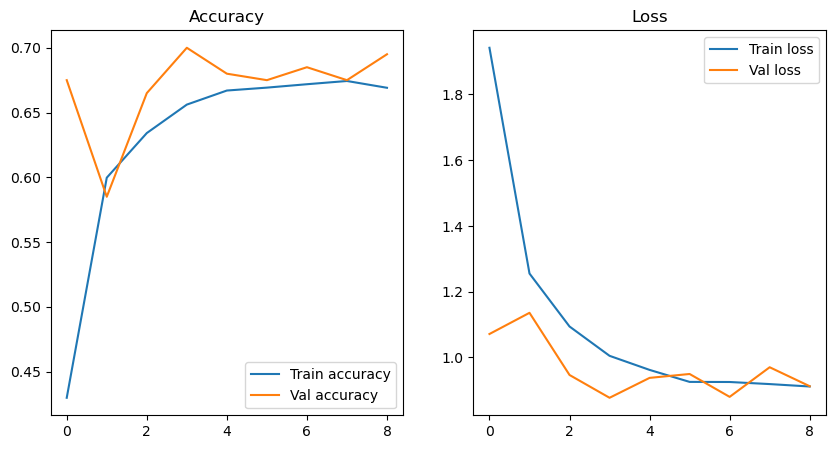

In [ ]:
#evaluate the trained model
train_loss4, train_acc4 = model5.evaluate(X_train, y_train_onehot, verbose=0)
print('Train loss:', train_loss4)
print('Train accuracy:', train_acc4)
plot_curves(m5)

Test loss: 0.8696666955947876
Test accuracy: 0.6866334080696106
57/57 [==============================] - 0s 6ms/step


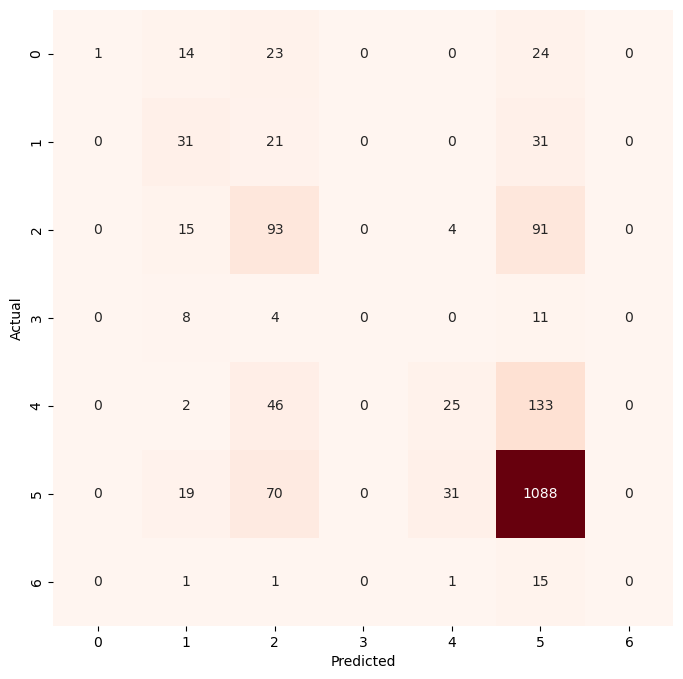

In [ ]:
#test the model
test_loss, test_acc = model5.evaluate(X_test, y_test_onehot, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

#plot the confusion matrix
plot_confusion_matrix(model5, X_test, y_test_onehot)


In [ ]:
#to cater to the class imbalance problem, we use class weights
class_distribution = np.array([258, 421, 871, 87, 887, 5367, 121])

# Calculate custom class weights
total_samples = np.sum(class_distribution)
num_classes = len(class_distribution)
custom_class_weights = total_samples / (num_classes * class_distribution)

# Normalize the weights to sum to 1.0
custom_class_weights /= np.sum(custom_class_weights)

# Print the calculated custom class weights
print(custom_class_weights)


[0.13613358 0.08342628 0.0403243  0.40370648 0.03959692 0.00654415
 0.2902683 ]


In [ ]:
#model 5.2 with focal loss
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weightss = [0.13613358, 0.08342628, 0.0403243,  0.40370648, 0.03959692, 0.00654415, 0.2902683]  

# Convert to dictionary format
class_weight_dict = {i: class_weightss[i] for i in range(len(np.unique(y_train)))}

def focal_loss(y_true, y_pred, alpha=0.25, gamma=2.0):
    # Calculate binary cross-entropy
    bce = tf.keras.backend.binary_crossentropy(y_true, y_pred, from_logits=False)

    # Calculate focal loss
    p_t = (y_true * y_pred) + ((1 - y_true) * (1 - y_pred))
    focal_loss = -alpha * (1 - p_t)**gamma * bce

    return tf.reduce_mean(focal_loss)

def create_refined_mlp52(input_shape, num_classes):
    initializer = HeNormal(seed=42)
    model52 = Sequential()
    model52.add(Flatten(input_shape=input_shape))
    model52.add(Dense(256, activation='relu', kernel_initializer=initializer))
    model52.add(BatchNormalization())
    model52.add(Dropout(0.5))
    model52.add(Dense(128, activation='relu', kernel_initializer=initializer))
    model52.add(BatchNormalization())
    model52.add(Dropout(0.5))
    model52.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))
    
    return model52

optimizer = SGD(learning_rate=0.001, momentum=0.9)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

model52 = create_refined_mlp(X_train[0].shape, len(np.unique(y_train)))
model52.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


m52 = model52.fit(X_train, y_train_onehot, batch_size=32, epochs=20, validation_data=(X_val, y_val_onehot), callbacks=[early_stopping], class_weight=class_weight_dict)
#evaluate the trained model
train_loss52, train_acc52 = model52.evaluate(X_train, y_train_onehot, verbose=0)
print('Train loss:', train_loss52)
print('Train accuracy:', train_acc52)

Epoch 1/20
251/251 [==============================] - 6s 20ms/step - loss: 0.0847 - accuracy: 0.1749 - val_loss: 2.7259 - val_accuracy: 0.0500
Epoch 2/20
251/251 [==============================] - 5s 20ms/step - loss: 0.0806 - accuracy: 0.1893 - val_loss: 2.7159 - val_accuracy: 0.1389
Epoch 3/20
251/251 [==============================] - 5s 21ms/step - loss: 0.0767 - accuracy: 0.2245 - val_loss: 2.4422 - val_accuracy: 0.2889
Epoch 4/20
251/251 [==============================] - 6s 22ms/step - loss: 0.0730 - accuracy: 0.2450 - val_loss: 2.1389 - val_accuracy: 0.2167
Epoch 5/20
251/251 [==============================] - 5s 21ms/step - loss: 0.0707 - accuracy: 0.2416 - val_loss: 1.3273 - val_accuracy: 0.5500
Epoch 6/20
251/251 [==============================] - 5s 20ms/step - loss: 0.0692 - accuracy: 0.2493 - val_loss: 1.5506 - val_accuracy: 0.4444
Epoch 7/20
251/251 [==============================] - 5s 19ms/step - loss: 0.0693 - accuracy: 0.2430 - val_loss: 1.7952 - val_accuracy: 0.4056

Test loss: 1.2581384181976318
Test accuracy: 0.545902669429779
51/51 [==============================] - 0s 4ms/step


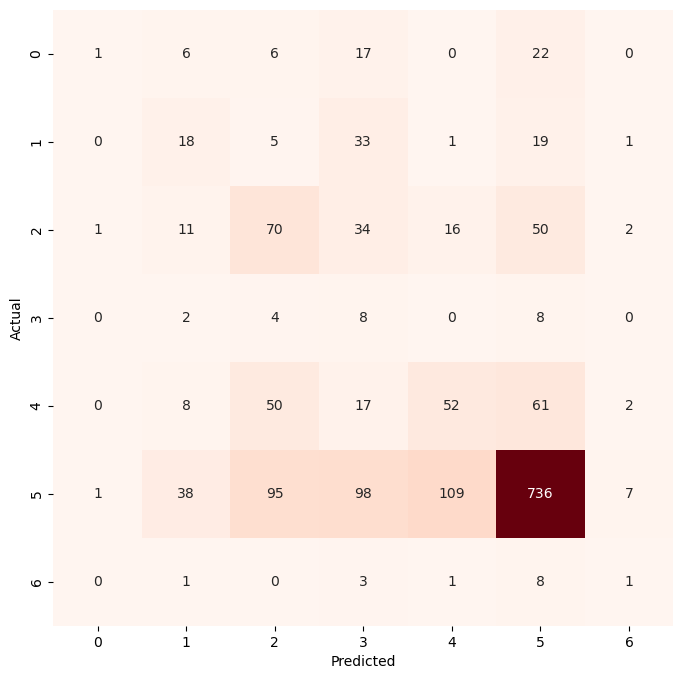

In [ ]:
#test the model
test_loss, test_acc = model52.evaluate(X_test, y_test_onehot, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

#display results as a confusion matrix


y_pred = model52.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
#check samples in each class
unique, counts = np.unique(y_train, return_counts=True)
print (np.asarray((unique, counts)))

#undersample from class 5 and make a new dataset y_train_us
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_us, y_train_us = rus.fit_resample(X_train.reshape(-1, 64*64*3), y_train)
X_train_us = X_train_us.reshape(-1, 64, 64, 3)


[[   0    1    2    3    4    5    6]
 [ 258  421  871   87  887 5367  121]]


In [ ]:
#check samples in each class
unique, counts = np.unique(y_train_us, return_counts=True)
print (np.asarray((unique, counts)))


[[ 0  1  2  3  4  5  6]
 [87 87 87 87 87 87 87]]


In [ ]:
#model 6
from keras.layers import BatchNormalization, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from keras.regularizers import l1, l2
from keras.initializers import HeNormal
from keras.callbacks import EarlyStopping

def create_improved_mlp2(input_shape, num_classes, l1_reg=0.01, l2_reg=0.01):
    initializer = HeNormal(seed=42)
    model6 = Sequential()
    
    # Input layer
    model6.add(Flatten(input_shape=input_shape))
    
    # Hidden layers with L1 and L2 regularization
    model6.add(Dense(256, activation='relu', kernel_initializer=initializer, kernel_regularizer=l1(l1_reg), kernel_constraint='max_norm'))
    model6.add(BatchNormalization())
    model6.add(Dropout(0.5))
    
    model6.add(Dense(128, activation='relu', kernel_initializer=initializer, kernel_regularizer=l2(l2_reg), kernel_constraint='max_norm'))
    model6.add(BatchNormalization())
    model6.add(Dropout(0.5))

    model6.add(Dense(64, activation='relu', kernel_initializer=initializer, kernel_regularizer=l2(l2_reg), kernel_constraint='max_norm'))
    model6.add(BatchNormalization())
    model6.add(Dropout(0.5))
    
    # Output layer
    model6.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))
    
    return model6

optimizer = SGD(learning_rate=0.001, momentum=0.9)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Create the improved model
model6 = create_improved_mlp2(X_train[0].shape, len(np.unique(y_train)))

# Compile the model with categorical cross-entropy loss
model6.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Fit the model with early stopping
history = model6.fit(X_train, y_train_onehot, batch_size=32, epochs=20, validation_data=(X_val, y_val_onehot), callbacks=[early_stopping])

# Evaluate the trained model
train_loss, train_acc = model6.evaluate(X_train, y_train_onehot, verbose=0)
print('Train loss:', train_loss)
print('Train accuracy:', train_acc)


Epoch 1/20
251/251 [==============================] - 15s 53ms/step - loss: 122.9678 - accuracy: 0.3854 - val_loss: 14.4705 - val_accuracy: 0.5850
Epoch 2/20
251/251 [==============================] - 11s 43ms/step - loss: 18.9463 - accuracy: 0.5749 - val_loss: 18.2900 - val_accuracy: 0.6550
Epoch 3/20
251/251 [==============================] - 11s 42ms/step - loss: 15.3056 - accuracy: 0.6288 - val_loss: 16.0042 - val_accuracy: 0.0750
Epoch 4/20
251/251 [==============================] - 11s 43ms/step - loss: 12.0829 - accuracy: 0.6419 - val_loss: 11.9144 - val_accuracy: 0.6500
Epoch 5/20
251/251 [==============================] - 11s 42ms/step - loss: 10.9411 - accuracy: 0.6563 - val_loss: 12.1775 - val_accuracy: 0.6500
Epoch 6/20
251/251 [==============================] - 11s 44ms/step - loss: 9.7944 - accuracy: 0.6610 - val_loss: 11.3493 - val_accuracy: 0.6500
Epoch 7/20
251/251 [==============================] - 10s 40ms/step - loss: 9.1537 - accuracy: 0.6665 - val_loss: 8.5517 - v

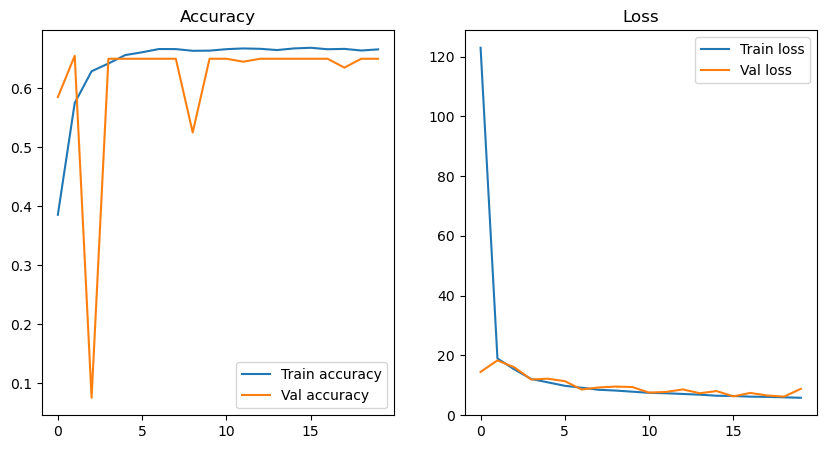

In [ ]:
plot_curves(history)

Test loss: 8.578981399536133
Test accuracy: 0.6699944734573364
57/57 [==============================] - 0s 5ms/step


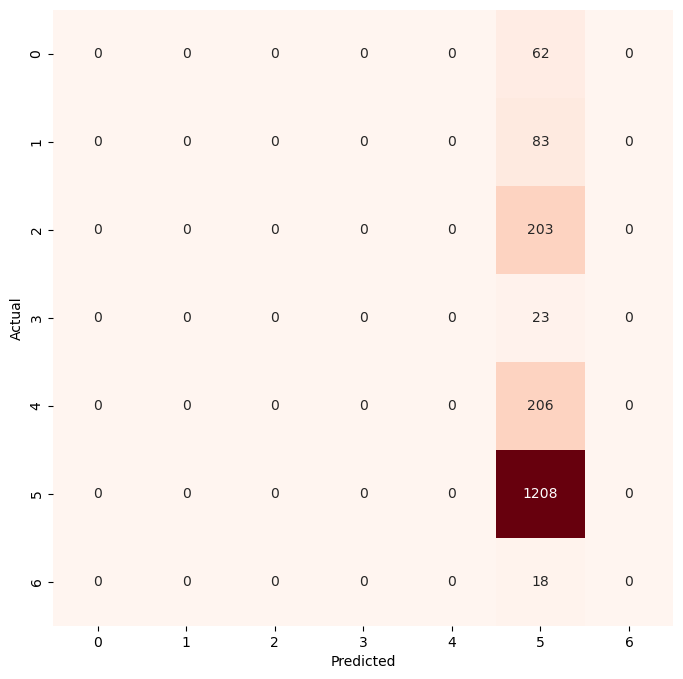

In [ ]:
#test the model
test_loss, test_acc = model6.evaluate(X_test, y_test_onehot, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

#display results as a confusion matrix
plot_confusion_matrix(model6, X_test, y_test_onehot)